In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\devli\Downloads\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
Quantitative_variables = df.select_dtypes(include=[np.number])
Quantitative_variables.head(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [9]:
Qualitative_varibles = df.select_dtypes(include=['object'])
Qualitative_varibles.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [10]:
from sklearn.preprocessing import LabelEncoder

Qualitative_varibles = Qualitative_varibles.apply(LabelEncoder().fit_transform)
Qualitative_varibles.head(5)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,1,2,2,1,0,7,2,0,1
1,0,1,1,1,1,6,1,0,0
2,1,2,1,4,1,2,2,0,1
3,0,1,1,1,0,6,1,0,1
4,0,2,1,3,1,2,1,0,0


In [11]:
data = pd.concat([Quantitative_variables,Qualitative_varibles],axis=1)
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DailyRate                 1470 non-null   int64
 2   DistanceFromHome          1470 non-null   int64
 3   Education                 1470 non-null   int64
 4   EmployeeCount             1470 non-null   int64
 5   EmployeeNumber            1470 non-null   int64
 6   EnvironmentSatisfaction   1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MonthlyIncome             1470 non-null   int64
 12  MonthlyRate               1470 non-null   int64
 13  NumCompaniesWorked        1470 non-null   int64
 14  PercentSalaryHike         1470 non-null 

In [13]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
data=data.fillna(data.mean())
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2,0,2,1,3,1,2,1,0,0


In [15]:
data.isna().sum()

Age                         0
DailyRate                   0
DistanceFromHome            0
Education                   0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobSatisfaction             0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
BusinessTravel              0
Department                  0
EducationField              0
Gender                      0
JobRole                     0
MaritalStatus               0
Over18    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion')

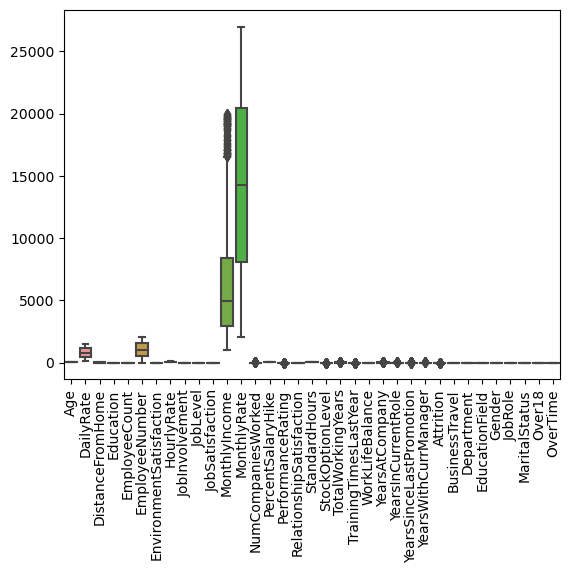

In [16]:
import seaborn as sns
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [17]:
data.MonthlyIncome.value_counts()

MonthlyIncome
2342     4
6142     3
2741     3
2559     3
2610     3
        ..
7104     1
2773     1
19513    1
3447     1
4404     1
Name: count, Length: 1349, dtype: int64

<Axes: >

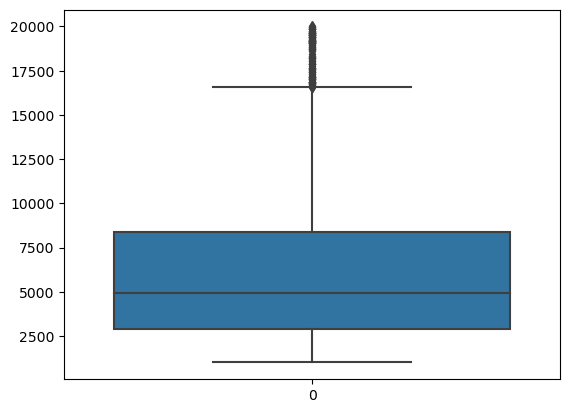

In [18]:
sns.boxplot(data.MonthlyIncome)

In [19]:
for i in data:
    if data[i].dtypes in ("float64","int64"):
        q1 = data[i].quantile(0.25)
        q3 = data[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        data[i].clip(lower=ll,upper=ul,inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion')

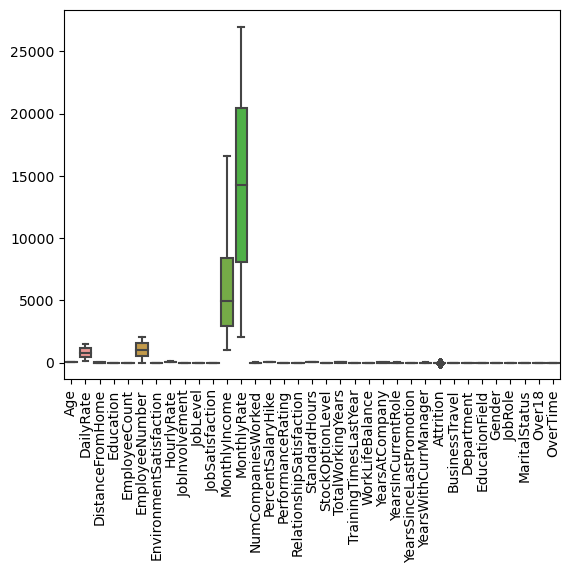

In [20]:
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [21]:
data.Attrition.value_counts(normalize=True)

Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64

In [22]:
x = data.drop('Attrition',axis=1)
y = data[['Attrition']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [23]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# EDA Completed

# Data Partition

In [24]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
12,31,670,26,1,1,16,1,31,3,1,...,3.0,2,1,1,1,6,0,0,0,0
642,38,395,9,3,1,893,2,98,2,1,...,2.0,2,2,2,1,8,1,0,0,0
1113,32,1200,1,4,1,1574,4,62,3,2,...,2.0,0,1,5,1,6,1,0,0,0
1053,57,405,1,2,1,1483,2,93,4,2,...,8.0,2,1,1,1,6,1,0,0,0
265,29,1210,2,3,1,366,1,78,2,2,...,0.0,2,2,3,1,7,1,0,0,0


# Model Building

In [26]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

df = DecisionTreeClassifier(criterion='gini')
df.fit(x_train,y_train)

DecisionTreeClassifier()

# Ploting the tree

In [27]:
train = pd.concat([y_train,x_train],axis=1)
train.head(2)

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
12,0,31,670,26,1,1,16,1,31,3,...,4.0,3.0,2,1,1,1,6,0,0,0
642,0,38,395,9,3,1,893,2,98,2,...,1.0,2.0,2,2,2,1,8,1,0,0


In [28]:
independent_variable = list(train.columns[1:])
independent_variable

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

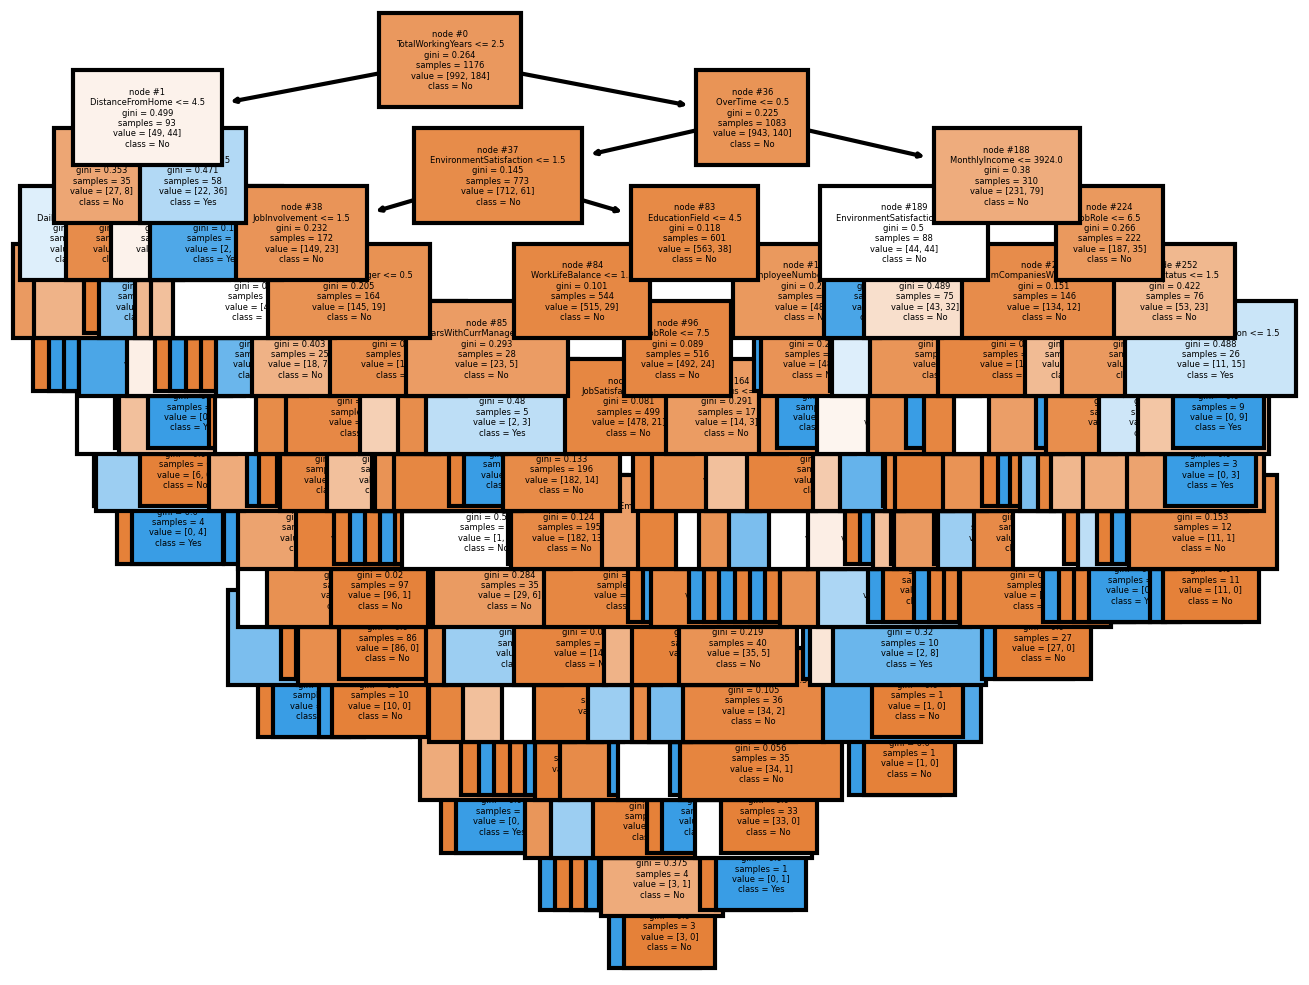

In [29]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names = ['No', 'Yes'],  # array, #  No,Yes
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2);

# Prediction on trained dataset

In [30]:
data.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,1,2,94,3,2,...,5.0,1,2,2,1,0,7,2,0,1
1,49,279,8,1,1,2,3,61,2,2,...,7.0,0,1,1,1,1,6,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,1,2,1,4,1,2,2,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,0,1,1,1,0,6,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,2.0,0,2,1,3,1,2,1,0,0


In [31]:
train['Predicted'] = dt.predict(x_train)
train.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Predicted
12,0,31,670,26,1,1,16,1,31,3,...,3.0,2,1,1,1,6,0,0,0,0
642,0,38,395,9,3,1,893,2,98,2,...,2.0,2,2,2,1,8,1,0,0,0
1113,0,32,1200,1,4,1,1574,4,62,3,...,2.0,0,1,5,1,6,1,0,0,0
1053,0,57,405,1,2,1,1483,2,93,4,...,8.0,2,1,1,1,6,1,0,0,0
265,0,29,1210,2,3,1,366,1,78,2,...,0.0,2,2,3,1,7,1,0,0,0


# Model Performance Metrics

In [32]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[992   0]
 [  0 184]]


In [33]:
Accuracy_Train=((992+184)/(1176)*100)
print(Accuracy_Train)

100.0


In [34]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       992
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



# Model Improvement by Pruning Method 

In [41]:
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(criterion='gini',
                                 min_samples_split=200,
                                 min_samples_leaf=100,
                                 max_depth=5)
df.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=200)

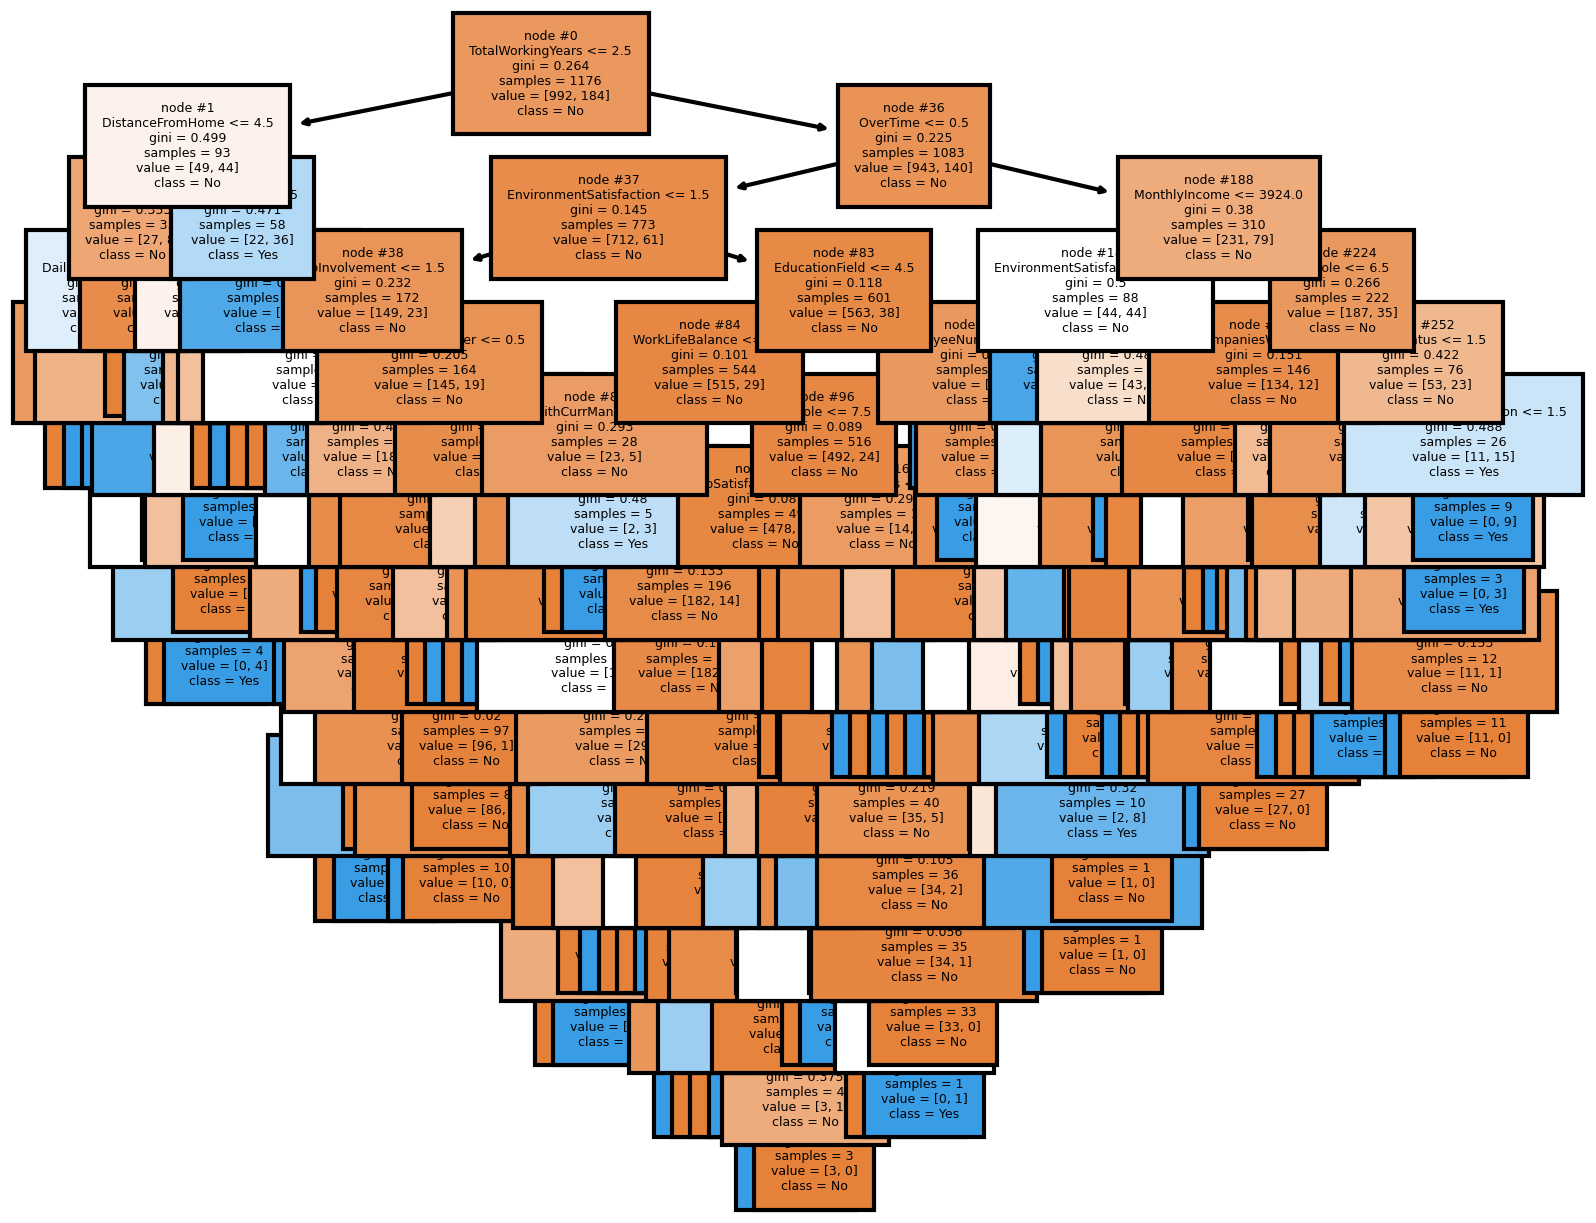

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,5), dpi=300)
tree.plot_tree(dt,
               feature_names = independent_variable,
               class_names = ['No', 'Yes'],
               filled = True,
               node_ids = True,
               fontsize=3);

# Stratergy and Prediction

In [44]:
train['Predicted'] = df.predict(x_train)
train.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Predicted
12,0,31,670,26,1,1,16,1,31,3,...,3.0,2,1,1,1,6,0,0,0,0
642,0,38,395,9,3,1,893,2,98,2,...,2.0,2,2,2,1,8,1,0,0,0
1113,0,32,1200,1,4,1,1574,4,62,3,...,2.0,0,1,5,1,6,1,0,0,0
1053,0,57,405,1,2,1,1483,2,93,4,...,8.0,2,1,1,1,6,1,0,0,0
265,0,29,1210,2,3,1,366,1,78,2,...,0.0,2,2,3,1,7,1,0,0,0


In [45]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Attrition'])
print(matrix)

[[992 184]
 [  0   0]]


In [46]:
Accuracy_Train=((992+0)/(1176)*100)
print(Accuracy_Train)

84.35374149659864


In [47]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       992
           1       0.00      0.00      0.00       184

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



# Prediction on test Data

In [48]:
test = pd.concat([x_test,y_test],axis=1)
test.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
264,28,529,2,4,1,364,1,79,3,1,...,0.0,2,1,1,1,2,2,0,0,1
1116,55,685,26,5,1,1578,3,60,2,5,...,13.0,2,2,2,1,3,1,0,0,0
1354,56,1162,24,2,1,1907,1,97,3,1,...,0.0,2,1,1,1,2,2,0,0,1
1143,45,336,26,3,1,1612,1,52,2,2,...,5.0,0,2,2,1,7,1,0,0,0
349,29,746,2,3,1,469,4,61,3,2,...,2.0,0,2,1,1,7,1,0,0,0


In [49]:
test['Predicted'] = dt.predict(x_test)
test.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition,Predicted
264,28,529,2,4,1,364,1,79,3,1,...,2,1,1,1,2,2,0,0,1,1
1116,55,685,26,5,1,1578,3,60,2,5,...,2,2,2,1,3,1,0,0,0,0
1354,56,1162,24,2,1,1907,1,97,3,1,...,2,1,1,1,2,2,0,0,1,1
1143,45,336,26,3,1,1612,1,52,2,2,...,0,2,2,1,7,1,0,0,0,0
349,29,746,2,3,1,469,4,61,3,2,...,0,2,1,1,7,1,0,0,0,0


# Model Performance Metrics on test data

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Attrition'])
print(confusion_matrix)

[[208  33]
 [ 33  20]]


In [51]:
Accuracy_test=((208+20)/(294)*100)
Accuracy_test

77.55102040816327

# Sensitivity & Specificity

In [52]:
from sklearn.metrics import classification_report
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       992
           1       0.00      0.00      0.00       184

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



In [53]:
from sklearn.metrics import classification_report
print(classification_report(test['Attrition'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       241
           1       0.38      0.38      0.38        53

    accuracy                           0.78       294
   macro avg       0.62      0.62      0.62       294
weighted avg       0.78      0.78      0.78       294



# Grid Search Method

In [54]:
params = { 'min_samples_split': [350,200,250,100], ## Parent 
           'min_samples_leaf': [120,50,100], ## Child or Leave 
           'max_depth':[3,4,5]}

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=52),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=52),
             param_grid={'max_depth': [3, 4, 5],
                         'min_samples_leaf': [120, 50, 100],
                         'min_samples_split': [350, 200, 250, 100]},
             verbose=1)

In [56]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=120, min_samples_split=350,
                       random_state=52)

# Live Data

In [57]:
Live_data_mar = x_test.iloc[0:5,:]
Live_data_mar

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
264,28,529,2,4,1,364,1,79,3,1,...,0.0,0.0,2,1,1,1,2,2,0,0
1116,55,685,26,5,1,1578,3,60,2,5,...,2.0,13.0,2,2,2,1,3,1,0,0
1354,56,1162,24,2,1,1907,1,97,3,1,...,1.0,0.0,2,1,1,1,2,2,0,0
1143,45,336,26,3,1,1612,1,52,2,2,...,4.0,5.0,0,2,2,1,7,1,0,0
349,29,746,2,3,1,469,4,61,3,2,...,0.0,2.0,0,2,1,1,7,1,0,0


In [58]:
Live_data_mar['Predicted'] = dt.predict(Live_data_mar)
Live_data_mar

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Predicted
264,28,529,2,4,1,364,1,79,3,1,...,0.0,2,1,1,1,2,2,0,0,1
1116,55,685,26,5,1,1578,3,60,2,5,...,13.0,2,2,2,1,3,1,0,0,0
1354,56,1162,24,2,1,1907,1,97,3,1,...,0.0,2,1,1,1,2,2,0,0,1
1143,45,336,26,3,1,1612,1,52,2,2,...,5.0,0,2,2,1,7,1,0,0,0
349,29,746,2,3,1,469,4,61,3,2,...,2.0,0,2,1,1,7,1,0,0,0


In [59]:
print(classification_report(train['Attrition'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       992
           1       0.00      0.00      0.00       184

    accuracy                           0.84      1176
   macro avg       0.42      0.50      0.46      1176
weighted avg       0.71      0.84      0.77      1176



# Finished